In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
pd.options.display.float_format = '{:.17f}'.format

In [2]:
tsv_path = "data/combined_results.tsv"
source_types = [
    "frame_count",
    "token_count"
]
source_types += [f"{n}gram" for n in [1,2,3,4,5]]

In [3]:
result_tsv = pd.read_csv(tsv_path, delimiter='\t')

In [4]:
approx_res = {
    'type': [],
    'slope': [],
    'intercept': [],
    'fitness': [],
}

In [5]:
for type in source_types:
    approx_res['type'].append(type)
    slope, intercept, *_ = linregress(
        result_tsv[type].to_numpy(),
        result_tsv["word_count"],
        # rcond=None
    )
    slope = float(slope)
    intercept = float(intercept)
    approx_res["slope"].append(slope)
    approx_res["intercept"].append(intercept)
    approx = slope * result_tsv[type] + intercept
    approx_res["fitness"].append(
        ((approx - result_tsv["word_count"]) ** 2).mean()
    )

In [6]:
approx_res_df = pd.DataFrame(approx_res)
approx_res_df

,type,slope,intercept,fitness
0,frame_count,0.10825193135228943,0.31278688856006198,35.01380367692801343
1,token_count,0.45905081221194471,3.35084392539901543,26.85384210296152929
2,1gram,0.20056136774402347,2.38795014798699512,22.81856983124359317
3,2gram,0.25945836207061684,2.84224652553639601,26.49418643226879766
4,3gram,0.34041230753252949,2.39160195769807871,24.25047378391045783
5,4gram,0.42691462871067182,2.33236898456692288,23.83961601449894374
6,5gram,0.46839572892779630,2.85321719400655738,27.86069305587638922


In [9]:
def plot_approx(type : str):
    plt.scatter(result_tsv[type], result_tsv["word_count"], s=1)
    plt.plot(
        [approx_res["intercept"][source_types.index(type)], 100 / approx_res["slope"][source_types.index(type)]],
        [0, 100],
        # approx_res["slope"][source_types.index(type)] * result_tsv[type],
        color='r',
    )
    plt.xlabel(type)
    plt.ylabel('word_count')
    plt.show()

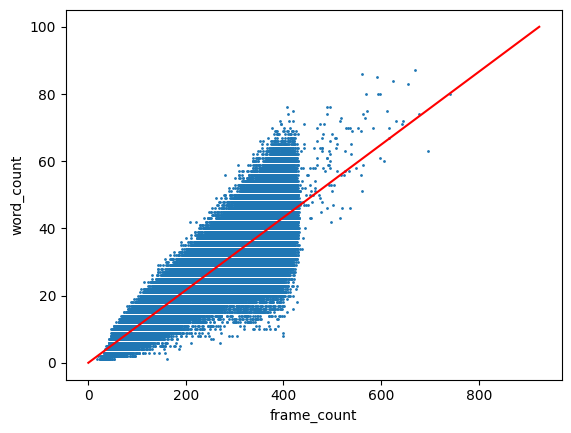

In [10]:
plot_approx("frame_count")

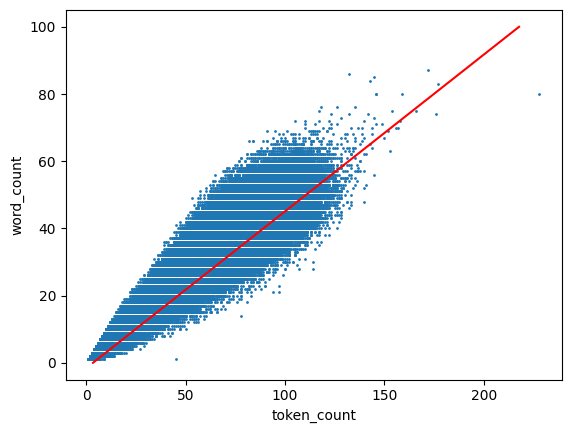

In [11]:
plot_approx("token_count")

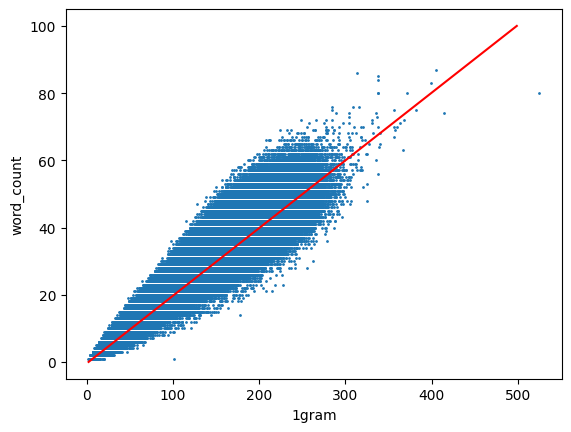

In [12]:
plot_approx("1gram")

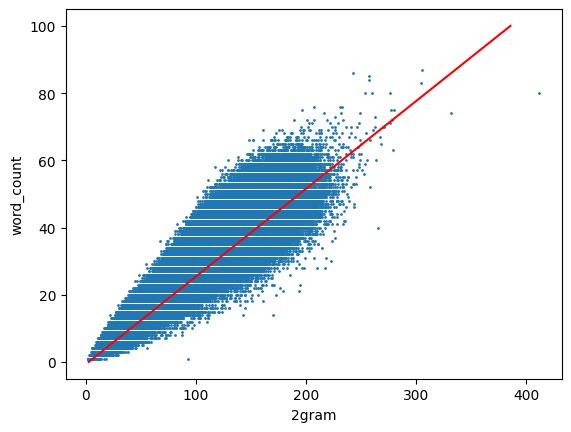

In [13]:
plot_approx("2gram")

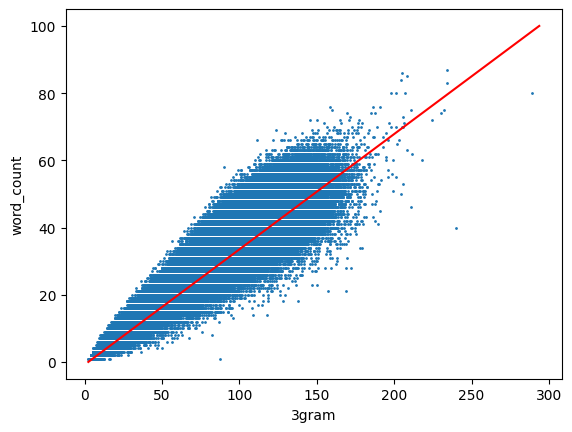

In [14]:
plot_approx("3gram")

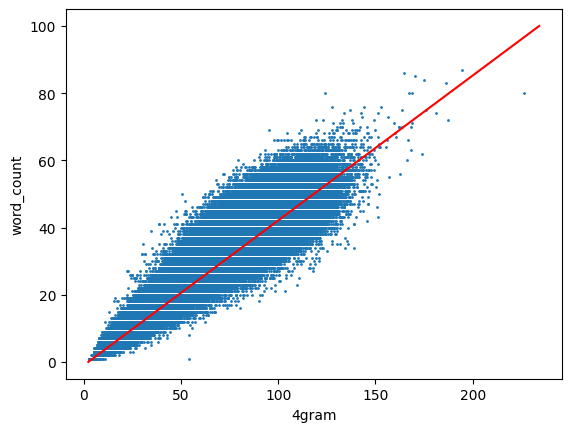

In [15]:
plot_approx("4gram")

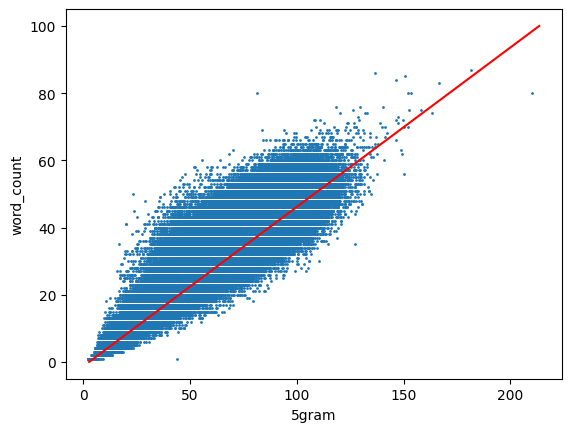

In [16]:
plot_approx("5gram")